In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score


In [2]:
# Load dataset
df = pd.read_csv('brain_tumor_dataset.csv')

In [ ]:
# Drop non-informative columns
df.drop(columns=["Patient_ID"], inplace=True)


In [3]:
# Encode categorical variables
label_encoders = {}
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [4]:

# Splitting features and target
X = df.drop(columns=["Tumor_Type", "Survival_Rate"])

In [7]:
# Classification task
y_classification = df["Tumor_Type"]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Regression task
y_regression = df["Survival_Rate"]
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_regression, test_size=0.2, random_state=42)

print('Train Completed ')

Train Completed 


In [8]:
# Standardizing numerical features
scaler = StandardScaler()
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)
X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

In [9]:
# Naive Bayes Classification Model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_c, y_train_c)


GaussianNB()

In [10]:
y_pred_c = nb_classifier.predict(X_test_c)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.46      0.48      1997
           1       0.50      0.54      0.52      2003

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.50      0.50      4000



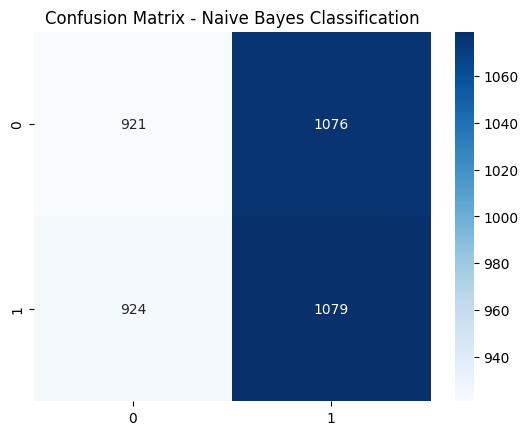

In [11]:
# Evaluate Classification
print("Naive Bayes Classification Report:\n", classification_report(y_test_c, y_pred_c))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes Classification")
plt.show()

In [14]:
# Naive Bayes Regression Model (Using GaussianNB as an approximation)
#nb_regressor = GaussianNB()
#nb_regressor.fit(X_train_r, y_train_r)
#y_pred_r = nb_regressor.predict(X_test_r)

### Using Naive Bayes Regression are not possible###


In [17]:
# Evaluate Regression
#print("MSE:", mean_squared_error(y_test_r, y_pred_r))
#print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))
#print("R2 Score:", r2_score(y_test_r, y_pred_r))


In [19]:
# Plot error distribution
#sns.histplot(y_test_r - y_pred_r, kde=True)
#plt.title("Error Distribution - Naive Bayes Regression")
#plt.show()